2. Los siguientes datos de refracción corresponden a un ensayo donde la geología consiste de capas
paralelas e inclinadas. Halle el número de capas presentes, estime las velocidades sísmicas y
espesores de cada una, y el ángulo de buzamiento de las capas.

In [4]:
pip install spicy

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


#Distancia desde el sitio de disparo
d = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]

#Tiempo perfil (ms)
t1 = [8.6, 12.9, 21.0, 27.6, 36.8, 41.9, 49.8, 52.2, 53.2, 54.6, 57.6, 61.4, 64.0, 65.9, 67.8, 70.6, 74.2, 75.0, 78.4, 78.0, 78.6, 79.3, 80.9, 82.5]

#Tiempo contraperfil (ms)
t21 = [6.7, 15.8, 17.7, 22.8, 26.7, 29.9, 33.3, 36.0, 37.8, 42.8, 46.7, 49.8, 51.5, 56.3, 60.1, 63.5, 65.6, 68.1, 74.2, 75.9, 78.8, 80.0, 79.4, 80.9]
t2 = t21[::-1]



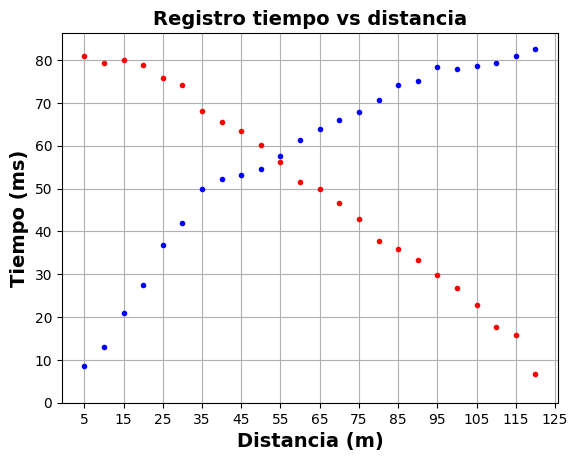

In [21]:
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.plot(d,t1, marker='.', linestyle = '', color='blue')
plt.plot(d,t2, marker='.', linestyle = '', color='red')

plt.xticks(np.arange(5, 126, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')

plt.show()

In [22]:
#Down-DIP
od_d1 = d[0:7]      #Distancias correspondientes a la onda directa Down-Dip
od_t1 = t1[0:7]     #Tiempos correspondientes a la onda directa Down-Dip
oc_d1 = d[6:17]     #Distancias correspondientes a la onda críticamente refractada Down-Dip (Frontera 2)
oc_t1 = t1[6:17]    #Tiempos correspondientes a la onda críticamente refractada Down-Dip
oc_d2 = d[16:24]    #Distancias correspondientes a la onda críticamente refractada Down-Dip (Frontera 3)
oc_t2 = t1[16:24]   #Tiempos correspondientes a la onda críticamente refractada Down-Dip

#Up-DIP
od_du1 = d[19:24]   #Distancias correspondientes a la onda directa Up-Dip
od_tu1 = t2[19:24]  #Tiempos correspondientes a la onda directa Up-Dip
oc_du1 = d[3:20]    #Distancias correspondientes a la onda críticamente refractada Up-Dip (Frontera 2)
oc_tu1 = t2[3:20]   #Tiempos correspondientes a la onda críticamente refractada Up-Dip
oc_du2 = d[0:4]     #Distancias correspondientes a la onda críticamente refractada Up-Dip (Frontera 3)
oc_tu2 = t2[0:4]    #Tiempos correspondientes a la onda críticamente refractada Up-Dip



In [ ]:
#Perfil
dwt = t1[0:7] #Tomo un rango de la lista t (Direct wave Time = dwt)
dwd = d[0:7] #(Direct wave Distnace = dwd)
cwt1 = t1[6:17] #(critic refracted wave time = cwt1)
cwd1 = d[6:17] #(critic refracted distnace = cwd1)
cwt2 = t1[16:24] #(critic refracted wave time = cwt2)
cwd2 = d[16:24] #(critic refracted distnace = cwd2)

#Contraperfil
dwtc = t2[19:24] #Tomo un rango de la lista t (Direct wave Time contraperfil = dwtc)
dwdc = d[19:24] #(Direct wave Distnace contraperfil = dwdc)
cwt3 = t2[3:20] #(critic refracted wave time = cwt3)
cwd3 = d[3:20] #(critic refracted distnace = cwd3)
cwt4 = t2[0:4] #(critic refracted wave time = cwt4)
cwd4 = d[0:4] #(critic refracted distnace = cwd4)

print(dwt, cwt1, cwt2)
print(dwd, cwd1, cwd2)
print()
print(cwt4, cwt3, dwtc)
print(cwd4, cwd3, dwdc)

In [23]:
from spicy import stats
#PERFIL
# Realiza una regresión lineal para el primer par de datos (X,Y)
mf1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(od_d1, od_t1)
# Realiza una regresión lineal para el segundo par de datos
mf2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(oc_d1, oc_t1)
# Realiza una regresión lineal para el tercer par de datos
mf3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(oc_d2, oc_t2)

#CONTRA PERFIL
# Realiza una regresión lineal para el primer par de datos (X,Y)
mc1, intercept4, r_value4, p_value4, std_err4 = stats.linregress(od_du1,od_tu1)
# Realiza una regresión lineal para el segundo par de datos
mc2, intercept5, r_value5, p_value5, std_err5 = stats.linregress(oc_du1, oc_tu1)
# Realiza una regresión lineal para el tercer par de datos
mc3, intercept6, r_value6, p_value6, std_err6 = stats.linregress(oc_du2, oc_tu2)

print('PERFIL')
print('Direct Wave:','md=',mf1, 'bp=',intercept1, r_value1, p_value1, std_err1)
print()
print('Critical refracted wave 1:', 'm1=',mf2, 'b1=',intercept2, r_value2, p_value2, std_err2)
print()
print('Critical refracted wave 2:', 'm2=',mf3, 'b2=',intercept3, r_value3, p_value3, std_err3)
print()
print('CCONTRAPERFIL')
print('Direct Wave:','mu=',mc1, 'bc=',intercept4, r_value4, p_value4, std_err4)
print()
print('Critical refracted wave 3:', 'm3=',mc2, 'b3=',intercept5, r_value5, p_value5, std_err5)
print()
print('Critical refracted wave 4:', 'm4=',mc3, 'b4=',intercept6, r_value6, p_value6, std_err6)

PERFIL
Direct Wave: md= 1.4099999999999997 bp= 0.17142857142857082 0.9975714136990417 5.575353757811094e-07 0.044026893450922734

Critical refracted wave 1: m1= 0.488 b1= 31.74727272727273 0.9945885554049492 3.664000967810982e-10 0.016991760548515943

Critical refracted wave 2: m2= 0.21642857142857141 b2= 56.17857142857143 0.9609786913335455 0.00014422744834218694 0.02543387674279723

CCONTRAPERFIL
Direct Wave: mu= -0.94 bc= 121.33999999999999 -0.9771922222468937 0.00412066135963563 0.11793783673331203

Critical refracted wave 3: m3= -0.6624019607843138 b3= 92.50882352941177 -0.9987733556246506 5.348702974898036e-21 0.008479107538049074

Critical refracted wave 4: m4= -0.11400000000000063 b4= 81.20000000000002 -0.8214416322175242 0.17855836778247577 0.05596427431853276


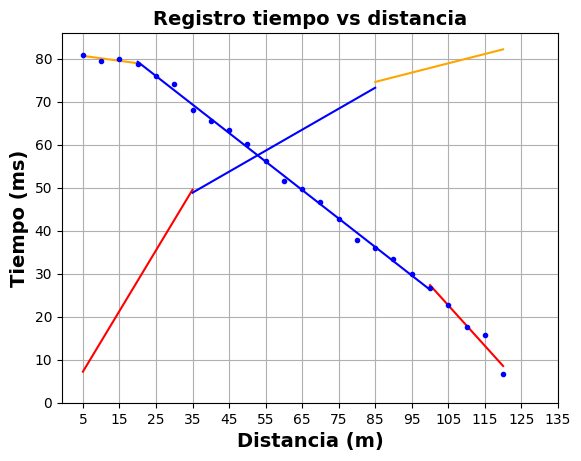

In [28]:
#Grafica de Perfil y Contraperfil

#DOWN - DIP
od_dd1 = np.array(d[0:7])       #Todas los valores que puede tomar la x para la recta y1
oc_dd1 = np.array(d[6:17])      #Todas los valores que puede tomar la x para la recta y2
oc_dd2 = np.array(d[16:24])     #Todas los valores que puede tomar la x para la recta y3

y1= mf1*od_dd1 + intercept1                                      #Ecuacion de la Onda Directa Down Dip
plt.plot(od_dd1, y1, color="red", label="Recta de Regresión")
y2= mf2*oc_dd1 + intercept2                                      #Ecuacion de la Onda criticamente refractada Down Dip FRONTERA 2
plt.plot(oc_dd1, y2, color="blue", label="Recta de Regresión")
y3= mf3*oc_dd2 + intercept3                                       #Ecuacion de la Onda criticamente refractada Down Dip FRONTERA 3
plt.plot(oc_dd2, y3, color="orange", label="Recta de Regresión")

#UP - DIP
od_dup0 = np.array(d[19:24])
oc_dup1 = np.array(d[3:20])
oc_dup2 = np.array(d[0:4])

y4= mc1*od_dup0 + intercept4                                     #Ecuacion de la Onda Directa Up Dip
plt.plot(od_dup0, y4, color="red", label="Recta de Regresión")
y5= mc2*oc_dup1 + intercept5                                     #Ecuacion de la Onda criticamente refractada Up Dip FRONTERA 2
plt.plot(oc_dup1, y5, color="blue", label="Recta de Regresión")
y6= mc3*oc_dup2 + intercept6                                     #Ecuacion de la Onda criticamente refractada Up Dip FRONTERA 3
plt.plot(oc_dup2, y6, color="orange", label="Recta de Regresión")

# Graphic
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.plot(d,t2, marker='.', linestyle = '', color='blue')

plt.xticks(np.arange(5, 140, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')

plt.show()

In [ ]:
#velocidad de onda directa en perfil (izquierda derecha) UP DIP
velu1=abs(round((1/mf1),3))
velu2=abs(round((1/mf2),3))
velu3=abs(round((1/mf3),3))

#velocidad de onda directa contraperfil (derecha izquierda) DOWN DIP
veld1=abs(round((1/mc1),3))
veld2=abs(round((1/mc2),3))
veld3=abs(round((1/mc3),3))


print('Perfil up dip')
print('Velocidad onda directa:', velu1, 'm/ms')
print('Velocidad onda criticamente refractada frontera 1:', velu2,'m/ms')
print('Velocidad onda criticamente refractada frontera 2:', velu3,'m/ms')
print()
print('Contraperfil down dip')
print('Velocidad onda directa:', veld1, 'm/ms')
print('Velocidad onda criticamente refractada frontera 1:', veld2,'m/ms')
print('Velocidad onda criticamente refractada frontera 2:', veld3,'m/ms')
print()
print('V1=',(velu1+veld1)/2)


Perfil up dip
Velocidad onda directa: 0.709 m/ms
Velocidad onda criticamente refractada frontera 1: 2.049 m/ms
Velocidad onda criticamente refractada frontera 2: 4.62 m/ms

Contraperfil down dip
Velocidad onda directa: 1.064 m/ms
Velocidad onda criticamente refractada frontera 1: 1.51 m/ms
Velocidad onda criticamente refractada frontera 2: 8.772 m/ms

V1= 0.8865000000000001


ANGULO DE BUZAMIENTO Y DE INCIDENCIA CR[ITICA]

In [ ]:
v1= (veld1+velu1)/2

#Buzamiento de fronteras (segun el punto, las fronteras son paralelas)
buz=0.5*(np.arcsin(v1/velu2)-np.arcsin(v1/veld2)) #MELO Frontera 1
#i=0.5*(np.arcsin(v1/veld2)+np.arcsin(v1/velu2)) #MELO
#print("i:", abs(round(np.degrees(i), 3)), "°", sep= ' ')
print("Buzamiento de la Primera Frontera:", abs(round(np.degrees(buz), 3)), "°", sep= ' ')
print()
#Angulo de refracción critica de la *primera* frontera (Perfil ~ UP DIP(Contra del buza))
i11 = (np.arcsin(v1/velu2)-buz)
#Angulo de incidencia en la primera frontera y de refracción crítica en la *segunda* frontera (Perfil ~ UP DIP(Contra del buza))
i12 = np.arcsin(v1/velu3)-buz
#Angulo de refracción critica en la *segunda* frontera (Perfil ~ UP DIP(Contra del buza))
i22 = (np.arcsin(v2/v3))
print('Perfil ~ UP DIP(Contra del buzamiento)')
print("i11:", round(np.degrees(i11), 3), "°", sep= ' ')
print("i12:", round(np.degrees(i12), 3), "°", sep= ' ')
print("i22:", round(np.degrees(i22), 3), "°", sep= ' ')
print()

#Angulo de la *primera* refraccion critica (Contraperfil ~ dOWN DIP(Favor del buza))
i11c = np.arcsin(v1/veld2)+buz
#Angulo de la *segunda* refraccion critica (Contraperfil ~ dOWN DIP(Favor del buza))
i12c = np.arcsin(v1/veld3)+buz
#Angulo de refracción critica en la *segunda* frontera (Perfil ~ UP DIP(Contra del buza))
i22 = (np.arcsin(v2/v3))
print('Contraperfil ~ dOWN DIP(Favor del buzamiento)')
print("Primera refraccion critica:", round(np.degrees(i11c), 3), "°", sep= ' ')
print('Segunda refraccion critica:', round(np.degrees(i12c), 3), "°", sep= ' ')
print()

v2=v1/np.sin(i11)
v3=v1/np.sin(i12)
print('Velocidad sobre la frontera 1, v1=',round(v1,3), "m/ms", sep= ' ')
print('Velocidad sobre la frontera 2, v2=',round(v2,3), "m/ms", sep= ' ')
print('Velocidad bajo la frontera 2, v3=',round(v3,3), "m/ms", sep= ' ')


Buzamiento de la Primera Frontera: 5.157 °

Perfil ~ UP DIP(Contra del buzamiento)
i11: 30.793 °
i12: 16.22 °
i22: 33.067 °

Contraperfil ~ dOWN DIP(Favor del buzamiento)
Primera refraccion critica: 30.793 °
Segunda refraccion critica: 0.643 °

Velocidad sobre la frontera 1, v1= 0.887 m/ms
Velocidad sobre la frontera 2, v2= 1.732 m/ms
Velocidad bajo la frontera 2, v3= 3.174 m/ms


ESPESOR

In [ ]:
#Espesores a Perfil
#capa 1
espp1=(v1*intercept2)/(2*np.cos(i11))
espp2= (((intercept3*v2)/2)-(espp1*np.cos(i12)))*(1/np.cos(i22))
#Espesores a ContraPerfil
#capa 2
espc1=(v1*abs(intercept5))/(2*np.cos(i11))
espc2= (((intercept6*v2)/2)-(espp1*np.cos(i12)))*(1/np.cos(i22))

print('Espesor de la capa 1 en perfil, h1=',round(espp1,3), "m", sep= ' ')
print('Espesor de la capa 2 en perfil, h2=',round(espp2,3), "m", sep= ' ')

print('Espesor de la capa 1 en Contraperfil, h1"=',round(espc1,3), "m", sep= ' ')
print('Espesor de la capa 2 en Contraperfil, h2"=',round(espc2,3), "m", sep= ' ')



Espesor de la capa 1 en perfil, h1= 16.381 m
Espesor de la capa 2 en perfil, h2= 39.272 m
Espesor de la capa 1 en Contraperfil, h1"= 47.734 m
Espesor de la capa 2 en Contraperfil, h2"= 65.123 m


In [ ]:
#Espesor a la izquierda
h1 = (intercept2*v1)/(2*np.cos(i11))
print("El espesor de la capa en el costado izquierdo es", round(h1, 3), "m")
h2 = (intercept5*v1)/(2*np.cos(i11))
print("El espesor de la capa en el costado derecho es", round(h2, 3), "m")

El espesor de la capa en el costado izquierdo es 16.381 m
El espesor de la capa en el costado derecho es 47.734 m
